## Wifi datasets

### 1. Loading packages

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import os as os
# Evaluation of the model
from sklearn.model_selection import KFold, train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.debugger import set_trace

### 2. Converting `mat` files to `csv`

In [ ]:
#Convert mat to .csv (do not run)
#path_file = "./feature_matrices/"
#entries = os.listdir(path_file)
#for entry in entries:
#    x = loadmat(entry)
#    data = pd.DataFrame(x['features'])
#    data.to_csv(entry.split(".mat")[0]+".csv",index=False)   

### 3. Feature relationship

In [3]:
######--------------------- Select the dataset ---------------------######
df = pd.read_csv("./feature_matrices/2_class_features_ideal.csv")
#df = pd.read_csv("./feature_matrices/2_class_features_least_ideal.csv")
#df = pd.read_csv("./feature_matrices/2_class_features_movingdoors.csv")
#df = pd.read_csv("./feature_matrices/2_class_features_occupant_variability.csv")
#df = pd.read_csv("./feature_matrices/5_class_feature_matrix_chamber.csv")
#df = pd.read_csv("./feature_matrices/5_class_feature_matrix.csv")
#df = pd.read_csv("./feature_matrices/identifying_people_features.csv")
######--------------------- Select the dataset ---------------------######

df['class'], _ = pd.factorize(df['class'])
# Plot features distributions
@interact
def get_column(feature1 = list(df.select_dtypes('number').columns[:-1]),
              feature2 = list(df.select_dtypes('number').columns[:-1])):
    aux = pd.DataFrame(df[[feature1, feature2, "class"]])
    aux.columns = ["feature1", "feature2","class"]
    fig = px.scatter(aux, y="feature1", x="feature2", color='class')
    fig.show()

interactive(children=(Dropdown(description='feature1', options=('fe1', 'fe2', 'fe3', 'fe4', 'fe5', 'fe6', 'fe7…

### 4. Classifying using holdout

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2805
           1       0.97      0.99      0.98      1615

    accuracy                           0.99      4420
   macro avg       0.98      0.99      0.98      4420
weighted avg       0.99      0.99      0.99      4420



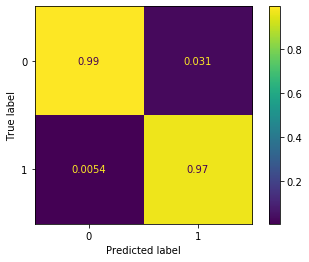

In [6]:
######--------------------- Select the dataset ---------------------######
#data = pd.read_csv("./feature_matrices/2_class_features_ideal.csv")
#data = pd.read_csv("./feature_matrices/2_class_features_least_ideal.csv")
#data = pd.read_csv("./feature_matrices/2_class_features_movingdoors.csv")
#data = pd.read_csv("./feature_matrices/2_class_features_occupant_variability.csv")
#data = pd.read_csv("./feature_matrices/5_class_feature_matrix_chamber.csv")
#data = pd.read_csv("./feature_matrices/5_class_feature_matrix.csv")
data = pd.read_csv("./feature_matrices/identifying_people_features.csv")
######--------------------- Select the dataset ---------------------######

data['class'], _ = pd.factorize(data['class'])
X = data.drop(["class"], axis=1)
y = data["class"]

# Get training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=0)
# SVC with default parameters values
model = SVC(kernel="poly") 
model.fit(x_train, y_train)
predictions = model.predict(x_test) 
print(classification_report(y_test, predictions)) 
plot_confusion_matrix(model, x_test, y_test, normalize="pred") 
plt.show()

### 5. Attribute selection

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2805
           1       0.96      0.99      0.97      1615

    accuracy                           0.98      4420
   macro avg       0.98      0.98      0.98      4420
weighted avg       0.98      0.98      0.98      4420



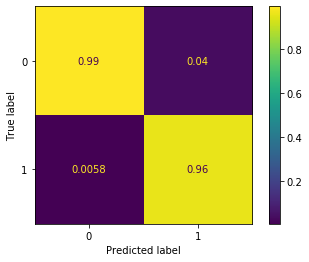

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif

######--------------------- Select the dataset ---------------------######
data = pd.read_csv("./feature_matrices/2_class_features_ideal.csv")
#data = pd.read_csv("./feature_matrices/2_class_features_least_ideal.csv")
#data = pd.read_csv("./feature_matrices/2_class_features_movingdoors.csv")
#data = pd.read_csv("./feature_matrices/2_class_features_occupant_variability.csv")
#data = pd.read_csv("./feature_matrices/5_class_feature_matrix_chamber.csv")
#data = pd.read_csv("./feature_matrices/5_class_feature_matrix.csv")
#data = pd.read_csv("./feature_matrices/identifying_people_features.csv")
######--------------------- Select the dataset ---------------------######

data['class'], _ = pd.factorize(data['class'])
X = data.drop(["class"], axis=1)
y = data["class"]

model = ExtraTreesClassifier(n_estimators=50)
model.fit(X,y)
feat_importances = model.feature_importances_  
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(5).plot(kind='barh')
#indices = np.argsort(model.feature_importances_)[::-1]
#plt.show()
indices = np.argsort(mutual_info_classif(X, y, discrete_features=True))[::-1]

X = X[np.array(X.columns[indices][0:49])]

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=0)
# SVC with default parameters values
model = SVC(kernel="poly") 
model.fit(x_train, y_train)
predictions = model.predict(x_test) 
print(classification_report(y_test, predictions)) 
plot_confusion_matrix(model, x_test, y_test, normalize="pred") 
plt.show()


### 6. PCA analysis

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2805
           1       0.93      0.95      0.94      1615

    accuracy                           0.96      4420
   macro avg       0.95      0.96      0.95      4420
weighted avg       0.96      0.96      0.96      4420



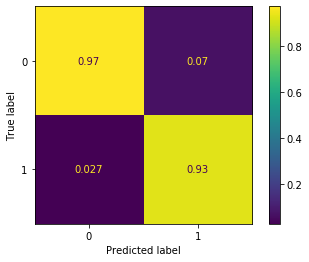

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


######--------------------- Select the dataset ---------------------######
data = pd.read_csv("./feature_matrices/2_class_features_ideal.csv")
#data = pd.read_csv("./feature_matrices/2_class_features_least_ideal.csv")
#data = pd.read_csv("./feature_matrices/2_class_features_movingdoors.csv")
#data = pd.read_csv("./feature_matrices/2_class_features_occupant_variability.csv")
#data = pd.read_csv("./feature_matrices/5_class_feature_matrix_chamber.csv")
#data = pd.read_csv("./feature_matrices/5_class_feature_matrix.csv")
#data = pd.read_csv("./feature_matrices/identifying_people_features.csv")
######--------------------- Select the dataset ---------------------######


data['class'], _ = pd.factorize(data['class'])
X = data.drop(["class"], axis=1)
y = data["class"]

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)

# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(.9)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

# SVC with default parameters values
model = SVC(kernel="poly") 
model.fit(x_train, y_train)
predictions = model.predict(x_test) 
print(classification_report(y_test, predictions)) 
plot_confusion_matrix(model, x_test, y_test, normalize="pred") 
plt.show()




### 7. GridSearch methodology

In [ ]:
# Searching more appropriate SVC parameters
# Method for each csv file:
# 1. Split the data into the train and test sets (70% for training and 30% for testing)
# 2. Use GridsearchCV to find out better parameters for Support Vector Classifier
#       C: [0.1, 1, 10, 100, 1000, 10000]  
#       gamma: [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 1 / (x_train.shape[0] * x_train.var())[0]] 
#       kernel: [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’]
# 3. Built a SVC using the best parameter setting with whole training set
# 4. Use the tuned SVC to get the predictions for each instance from the testing set


path_file = "./feature_matrices/"
entries = os.listdir(path_file)
results = pd.DataFrame()
for entry in entries:
    df = pd.read_csv(path_file+entry)
    print(path_file+entry)
    df['class'], _ = pd.factorize(df['class'])
    X = df.drop(["class"], axis=1)
    y = df["class"]

    # Step - 1: Sample rows (80% for training, 20% for testing)
    x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.20,
                                                        random_state=0,
                                                        stratify=y)
    test_p = pd.concat([x_test, y_test], axis=1)
    test_p.to_csv("./test_"+entry, index=False)

    # Step - 2: Applying GridsearchCV 
    # defining parameter range 
    param_grid = {'C': [0.1, 1, 10, 100, 1000], 
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1 / (x_train.shape[0] * x_train.var())[0]],  
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

    # Running the grid search
    grid = GridSearchCV(SVC(), param_grid, refit = True, cv=5, verbose=2)

    # Step - 3: Building the SVC using the best parameter setting with whole training set
    grid.fit(x_train, y_train) 

    # print best parameter after tuning 
    print(grid.best_params_) 

    # Step - 4: Using the tuned SVC to get the predictions for each instance from the testing set
    grid_predictions = grid.predict(x_test)
    print(classification_report(y_test, grid_predictions))
    bp = np.transpose(pd.DataFrame([entry,grid.best_params_["C"], grid.best_params_["gamma"], grid.best_params_["kernel"]]))
    bp.columns=["file","C", "gamma", "kernel"]
    results = results.append(pd.DataFrame(bp))
    
results.to_csv("./gridSearch_result.csv",index=False)


#### 7.1 Results of GridSearch

Dataset| Kernel | Gamma | C
-------|--------|-------|-------
identifying_people_features.csv | poly | 1 | 0.1
2_class_features_ideal.csv | poly | 0.0001 | 0.1 
5_class_feature_matrix.csv | poly | 0.0001 | 0.1
5_class_feature_matrix_chamber.csv | poly | 0.0001 | 0.1



### 8. Using tuned parameters

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1128
           1       0.97      0.99      0.98      1096
           2       0.99      0.98      0.99      1218
           3       0.98      0.97      0.98      1050
           4       0.99      0.98      0.98      1108

    accuracy                           0.98      5600
   macro avg       0.98      0.98      0.98      5600
weighted avg       0.98      0.98      0.98      5600



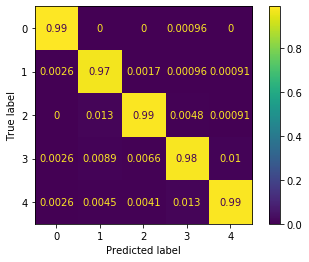

In [9]:
######--------------------- Select the dataset ---------------------######
#data = pd.read_csv("./feature_matrices/identifying_people_features.csv")
#data = pd.read_csv("./feature_matrices/2_class_features_ideal.csv")
#data = pd.read_csv("./feature_matrices/5_class_feature_matrix.csv")
data = pd.read_csv("./feature_matrices/5_class_feature_matrix_chamber.csv")
######--------------------- Select the dataset ---------------------######

data['class'], _ = pd.factorize(data['class'])
X = data.drop(["class"], axis=1)
y = data["class"]

# Get training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=0)
# SVC with default parameters values
#model = SVC(kernel="poly", gamma=1, C=0.1) # for identifying_people_features.csv
#model = SVC(kernel="poly", gamma=0.0001, C=0.1) # for 2_class_features_ideal.csv
#model = SVC(kernel="poly", gamma=0.0001, C=0.1) # for 5_class_feature_matrix.csv
model = SVC(kernel="poly", gamma=0.0001, C=0.1) # for 5_class_feature_matrix_chamber.csv

model.fit(x_train, y_train)
predictions = model.predict(x_test) 
print(classification_report(y_test, predictions)) 
plot_confusion_matrix(model, x_test, y_test, normalize="pred") 
plt.show()